variableX = np.arange(1,100)

What is the output of variableX[::10]?

what is the output of variableX[::-1]?

What is a decorater? where it's used?


Why we need docker and kubernetes?


In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import OrderedDict

from sklearn import datasets
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
DISPLAY_PRECISION = 4
pd.set_option("display.precision", DISPLAY_PRECISION)

In [12]:
dat = datasets.load_breast_cancer()
ad = dat.data
print(ad.shape)
# print(dat.DESCR)  # detailed description

(569, 30)


In [13]:
print("The sklearn breast cancer dataset keys:")
print(dat.keys()) # dict_keys(['target_names', 'target', 'feature_names', 'data', 'DESCR'])
print("---")

# Note that we need to reverse the original '0' and '1' mapping in order to end up with this mapping:
# Benign = 0 (negative class)
# Malignant = 1 (positive class)

li_classes = [dat.target_names[1], dat.target_names[0]]
li_target = [1 if x==0 else 0 for x in list(dat.target)]
print(len(li_target))
li_ftrs = list(dat.feature_names)
print(li_ftrs)
print("There are 2 target classes:")
print("li_classes", li_classes)
print("---")
print("Target class distribution from a total of %d target values:" % len(li_target))
print(pd.Series(li_target).value_counts())
print("---")

df_all = pd.DataFrame(dat.data[:,:], columns=li_ftrs)
print("Describe dataframe, first 6 columns:")
print(df_all.iloc[:,:].describe().to_string())

The sklearn breast cancer dataset keys:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
---
569
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
There are 2 target classes:
li_classes ['benign', 'malignant']
---
Target class distribution from a total of 569 target values:
0    357
1    212
dtype: int64
---
Describe dataframe, first 6 columns:
       mean radius  mean texture  mean perimeter  mean area  mean sm

# **Question: (2 min)**
**1.) What is the most correlated variable to target?**

In [15]:

#df_all.insert(30,'target',li_target)
#print(df_all)
cmat = df_all.corr().sort_values('target')
print(cmat['target'])

print('Most correlated is worst concave points')

smoothness error          -0.0670
mean fractal dimension    -0.0128
texture error             -0.0083
symmetry error            -0.0065
fractal dimension error    0.0780
concavity error            0.2537
compactness error          0.2930
worst fractal dimension    0.3239
mean symmetry              0.3305
mean smoothness            0.3586
concave points error       0.4080
mean texture               0.4152
worst symmetry             0.4163
worst smoothness           0.4215
worst texture              0.4569
area error                 0.5482
perimeter error            0.5561
radius error               0.5671
worst compactness          0.5910
mean compactness           0.5965
worst concavity            0.6596
mean concavity             0.6964
mean area                  0.7090
mean radius                0.7300
worst area                 0.7338
mean perimeter             0.7426
worst radius               0.7765
mean concave points        0.7766
worst perimeter            0.7829
worst concave 

<AxesSubplot: >

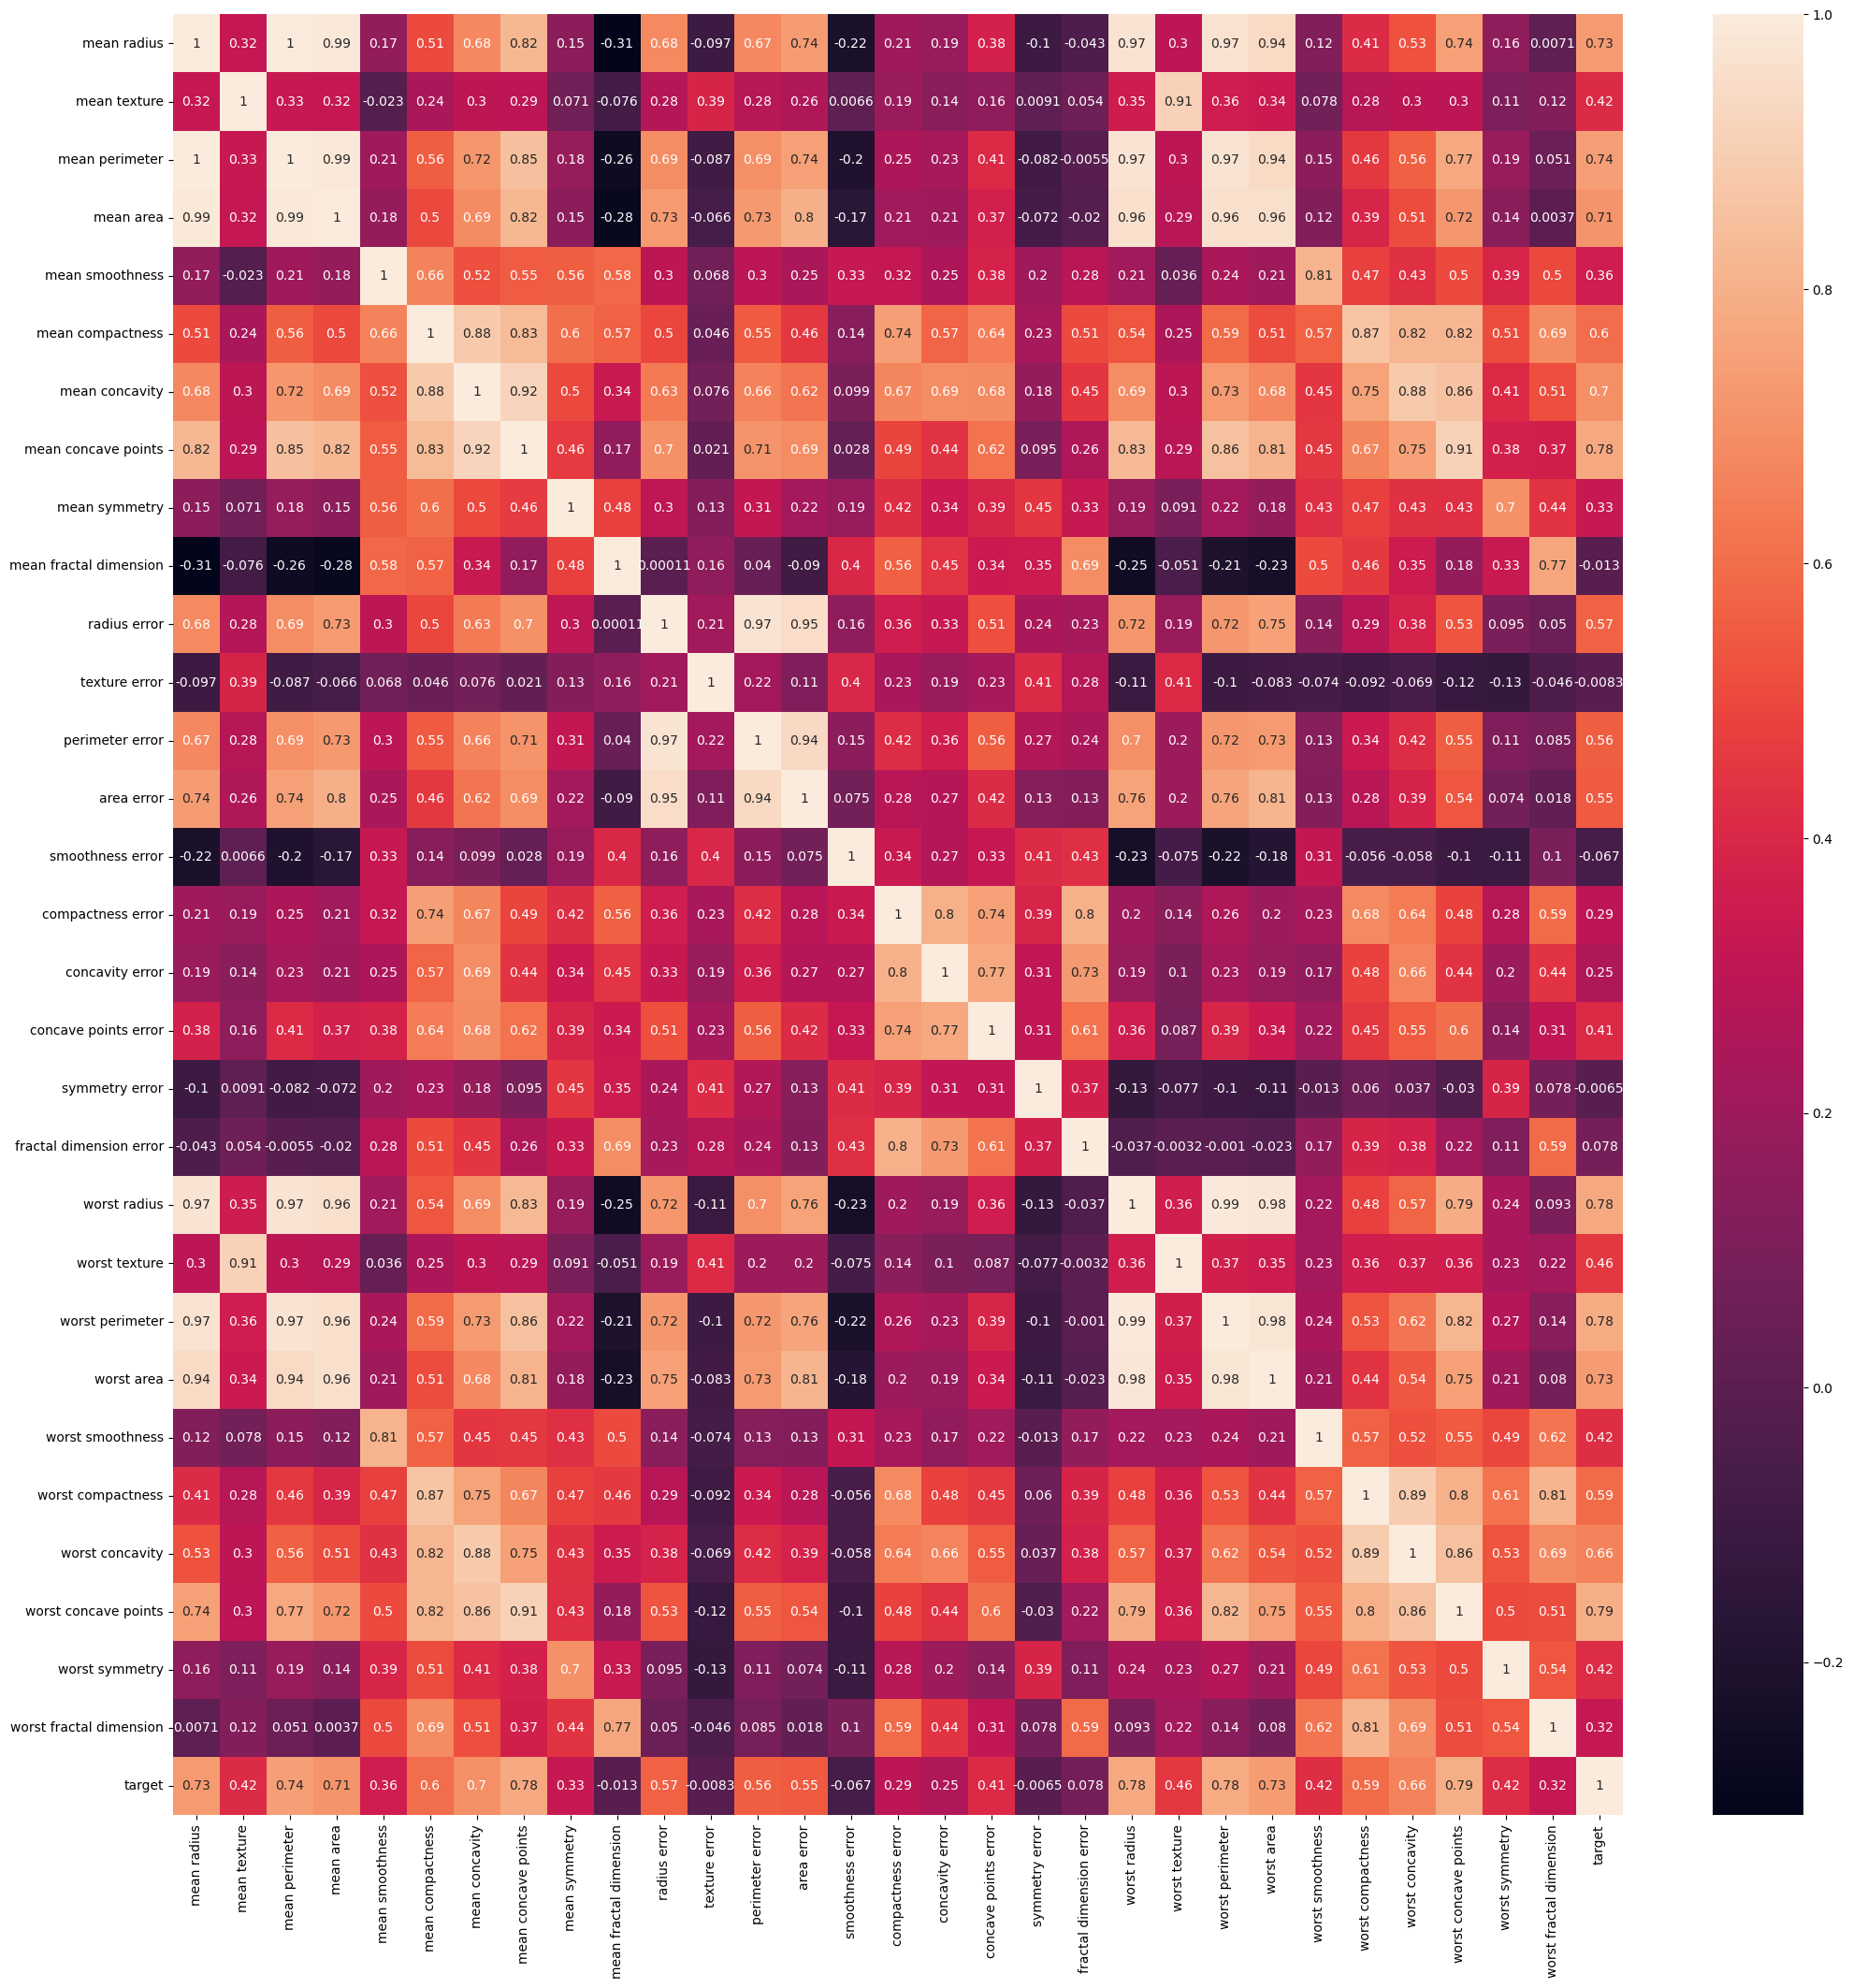

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25,25))

sns.heatmap(df_all.corr(), annot = True)

# **Question: (8 min)**

**2.) Of the top five most correlated variable what is the quatitative difference, with standard deviation, between Benign(Negative) and Malignant(Positive)?**

In [ ]:
#df_all = pd.DataFrame(dat.data[:,:], columns=li_ftrs)
#df_all.insert(30,'target',li_target)
df_all
worst_concave_points_0= []
worst_concave_points_1 =[]
worst_perimeter_0 =[]
worst_perimeter_1 =[]
mean_concave_points_0= []
mean_concave_points_1 =[]
worst_radius_0= []
worst_radius_1 =[]
mean_perimeter_0= []
mean_perimeter_1 =[]
for i in range(0, 569):
  if df_all['target'][i]==0:
    worst_concave_points_0.append(df_all['worst concave points'][i])
    worst_perimeter_0.append(df_all['worst perimeter'][i])
    mean_concave_points_0.append(df_all['mean concave points'][i])
    worst_radius_0.append(df_all['worst radius'][i])
    mean_perimeter_0.append(df_all['mean perimeter'][i])
  else:
    worst_concave_points_1.append(df_all['worst concave points'][i])
    worst_perimeter_1.append(df_all['worst perimeter'][i])
    mean_concave_points_1.append(df_all['mean concave points'][i])
    worst_radius_1.append(df_all['worst radius'][i])
    mean_perimeter_1.append(df_all['mean perimeter'][i])
worstconcave_points_0 = np.asarray(worst_concave_points_0,dtype=float)
worstconcave_points_1 = np.asarray(worst_concave_points_1,dtype=float)

worst_perimeter_0 = np.asarray(worst_perimeter_0,dtype=float)
worst_perimeter_1 = np.asarray(worst_perimeter_1,dtype=float)

mean_concave_points_0 = np.asarray(mean_concave_points_0,dtype=float)
mean_concave_points_1 = np.asarray(mean_concave_points_1,dtype=float)

worst_radius_0 = np.asarray(worst_radius_0,dtype=float)
worst_radius_1 = np.asarray(worst_radius_1,dtype=float)

mean_perimeter_0 = np.asarray(mean_perimeter_0,dtype=float)
mean_perimeter_1 = np.asarray(mean_perimeter_1,dtype=float)
print(worstconcave_points_0.std())
print(worstconcave_points_1.std())
print(worst_perimeter_0.std())
print(worst_perimeter_1.std())
print(mean_concave_points_0.std())
print(mean_concave_points_1.std())
print(worst_radius_0.std())
print(worst_radius_1.std())
print(mean_perimeter_0.std())
print(mean_perimeter_1.std())
   
          


       

0.03574720223902436
0.04619844449146942
13.508132109327223
29.38749885651923
0.015886481551090136
0.03429274250740593
1.9785905990796204
4.273454753526457
11.790888955886492
21.803048370671174


In [ ]:
# the std deviation of worst perimeter is influencing the target class 1 more , whereas the std deviation of mean concave points is less for target class 0

In [6]:
import numpy as np
variableX = np.arange(1,100)
x=variableX[::-10]
y=variableX[::-1]
x

array([99, 89, 79, 69, 59, 49, 39, 29, 19,  9])